![](images/obspy_logo_full_524x179px.png)

<div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.9) ; line-height: 100%">ObsPy: scaricare i dati</div>

---

In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

ObsPy ha clients per accedere direttamente ai dati via...

- FDSN webservices (IRIS, Geofon/GFZ, USGS, NCEDC, SeisComp3 instances, ...)
- ArcLink (EIDA, ...)
- Earthworm
- SeedLink (near-realtime servers)
- NERIES/NERA/seismicportal.eu
- NEIC
- SeisHub (local seismological database)

Questa introduzione mostra come usare il client webservice FDSN. Il webservice FDSN è per adesso il default webservice implementato da molti data centers in tutto il mondo. Clients per altri protocolli lavorano in maniera simile al client FDSN.

#### Dati di forme d'onda

1 Trace(s) in Stream:
II.PFO.00.LHZ | 2014-08-24T10:15:44.069500Z - 2014-08-24T10:40:43.069500Z | 1.0 Hz, 1500 samples


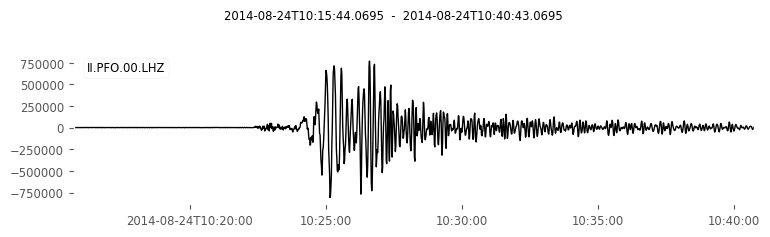

In [2]:
import obspy
from obspy.clients.fdsn import Client

client = Client("IRIS")
t = obspy.UTCDateTime("2014-08-24T10:20:44.0")  # South Napa Earthquake
st = client.get_waveforms("II", "PFO", "00", "LHZ",
                          t - 5 * 60, t + 20 * 60)
print(st)
st.plot()

- di nuovo, i dati delle forma d'onda vengono restitutito come oggetti stream
- per tutti i flussi di lavoro di elaborazione personalizzati, non importa se i dati provengono da un file locale o da un servizio Web


#### Metadati degli eventi 

Il client FDSN può essere usato per richiedere metadati degli eventi: 

1 Event(s) in Catalog:
2014-08-24T10:20:45.600000Z | +38.201, -122.086 | 6.1 MW


/Users/spina/anaconda2/envs/obspy/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


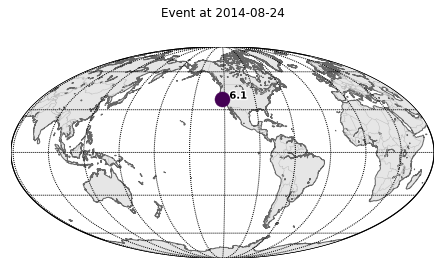

In [3]:
t = obspy.UTCDateTime("2014-08-24T10:20:44.0")  # South Napa earthquake
catalog = client.get_events(starttime=t - 100, endtime=t + 3600,
                            minmagnitude=6)
print(catalog)
catalog.plot();

Le richieste possono avere una vasta gamma di vincoli (vedi [ObsPy Documentation](http://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_events.html)):

- intervallo di tempo
- intervallo geografico (lonlat-box, cerchio con distanza)
- intervallo di profondità
- intervallo di magnitudo, tipo
- agenzia contributiva

#### Metadati delle stationi

Infine, il client FDSN può essere utilizzato per richiedere i metadati della stazione. Le stazioni possono essere consultate utilizzando una vasta gamma di vincoli (vedi [ObsPy documentation](http://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_stations.html)):

 * codice network/station
 * intervallo di tempo di funzionamento
 * geografico (lonlat-box, circolare per distanza)

Inventory created at 2018-04-23T13:32:32.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.32
		    http://service.iris.edu/fdsnws/station/1/query?latitude=37.681873&s...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (3):
			GS, NC, NP
		Stations (13):
			GS.LV1B (Tri-Valley urban array)
			GS.LV1C (Tri-Valley urban array)
			GS.LV1D (Tri-Valley urban array)
			GS.LV1E (Tri-Valley urban array)
			GS.LV1F (Tri-Valley urban array)
			GS.LV1G (Tri-Valley urban array)
			GS.LV1H (Tri-Valley urban array)
			GS.LV1I (Tri-Valley urban array)
			GS.TVK4 (Tri-Valley urban array)
			NC.CBZ (Buffer Zone)
			NP.1786 (Livermore FS 6 East Av)
			NP.1803 (Livermore FS 8 Scenic)
			NP.1842 (Livermore FS 7 Rincon)
		Channels (0):



/Users/spina/anaconda2/envs/obspy/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch


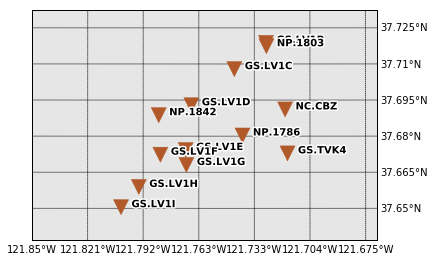

In [4]:
event = catalog[0]
origin = event.origins[0]

# Livermore
lon = -121.768005
lat = 37.681873

# Get currently active stations in 5 km radius around Livermore.
inventory = client.get_stations(longitude=lon, latitude=lat,
                                maxradius=0.05, level="station", 
                                starttime=obspy.UTCDateTime())
print(inventory)
inventory.plot(projection="local", resolution="i");

La parola-chiave **`level=...`** è usata per specificare il livello di dettaglio nell'inventario richiesto

- `"network"`: restituisce solo informazioni sulle reti che corrispondono ai criteri
- `"station"`: restituisce informazioni su tutte le stazioni corrispondenti
- `"channel"`: restituisce le informazioni sui canali disponibili in tutte le reti di stazioni che soddisfano i criteri
- `"response"`: include la risposta dello strumento per tutti i canali corrispondenti (grande dimensione dei dati dei risultati!)

In [5]:
inventory = client.get_stations(network="II", station="PFO",
                                level="station")
print(inventory)

Inventory created at 2018-04-23T13:32:43.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.32
		    http://service.iris.edu/fdsnws/station/1/query?station=PFO&network=...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			II
		Stations (2):
			II.PFO (Pinon Flat, California, USA) (2x)
		Channels (0):



In [6]:
inventory = client.get_stations(network="II", station="PFO",
                                level="channel")
print(inventory)

Inventory created at 2018-04-23T13:32:46.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.32
		    http://service.iris.edu/fdsnws/station/1/query?station=PFO&network=...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			II
		Stations (2):
			II.PFO (Pinon Flat, California, USA) (2x)
		Channels (566):
			II.PFO..LOG (2x), II.PFO.00.BHZ (26x), II.PFO.00.BHN (18x), 
			II.PFO.00.BHE (18x), II.PFO.00.BH1 (10x), II.PFO.00.BH2 (8x), 
			II.PFO.00.BLZ (8x), II.PFO.00.BLN (8x), II.PFO.00.BLE (8x), 
			II.PFO.00.ENZ (6x), II.PFO.00.ENN (6x), II.PFO.00.ENE (6x), 
			II.PFO.00.EN1, II.PFO.00.EN2, II.PFO.00.LCE, II.PFO.00.LCQ, 
			II.PFO.00.LDI (2x), II.PFO.00.LHZ (25x), II.PFO.00.LHN (17x), 
			II.PFO.00.LHE (17x), II.PFO.00.LH1 (10x), II.PFO.00.LH2 (8x), 
			II.PFO.00.LLZ (7x), II.PFO.00.LLN (7x), II.PFO.00.LLE (7x), 
			II.PFO.00.LNZ (6x), II.PFO.00.LNN (6x), II.PFO.00.LNE (6x), 
			II.PFO.00.LN1, II.PFO.00.LN2, II.PFO.00.MHZ (3x), 
			II.PFO.00.MHN (2x

Per le richieste di forme d'onda che includono la correzione dello strumento, è necessario scaricare anche le informazioni di risposta dello strumento appropriate.

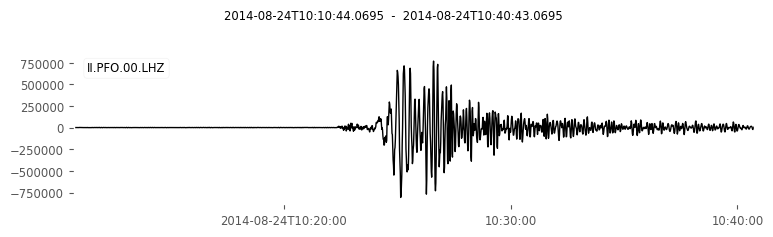

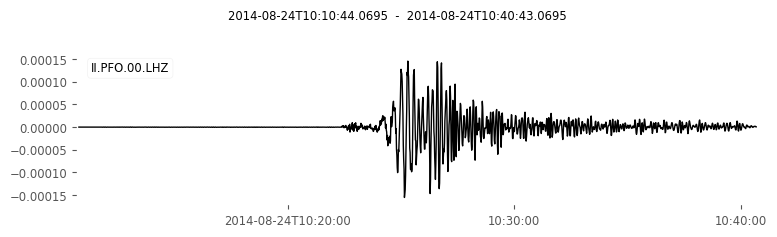

In [7]:
t = obspy.UTCDateTime("2014-08-24T10:20:44.0")  # South Napa earthquake
st = client.get_waveforms("II", "PFO", "00", "LHZ",
                          t - 10 * 60, t + 20 * 60)
inv = client.get_stations(network="II", station="PFO", location="00", channel="LHZ",
                          level="response", starttime=t - 10, endtime=t + 10)
st.plot()

st.remove_response(inventory=inv)
st.plot()

Tutti i dati richiesti usando il client FDSN possono essere salvati direttamente su file usando l'opzione **`filename =" ... "`**. I dati vengono quindi memorizzati esattamente come sono forniti dal data center, ovvero senza prima eseguire il parsing di ObsPy e l'output di ObsPy.

In [8]:
client.get_events(starttime=t-100, endtime=t+24*3600, minmagnitude=5,
                  filename="/tmp/requested_events.xml")
client.get_stations(network="II", station="PFO", level="station",
                    filename="/tmp/requested_stations.xml")
client.get_waveforms("II", "PFO", "00", "LHZ", t - 10 * 60, t + 20 * 60,
                     filename="/tmp/requested_waveforms.mseed")
!ls -lrt /tmp/requested*

-rw-r--r--  1 spina  wheel  24844 Apr 23 15:32 /tmp/requested_stations.xml
-rw-r--r--  1 spina  wheel  11515 Apr 23 15:32 /tmp/requested_events.xml
-rw-r--r--  1 spina  wheel  12288 Apr 23 15:32 /tmp/requested_waveforms.mseed


#### Esercizi con Client FDSN

Usare il client FDSN per assemblare un piccolo dataset di forme d'onda per un evento.

- cercare un grande terremoto (e.g. per profondità o in una regione a scelta, utilizzare l'opzione **`limit = 5`** per mantenere basso il traffico di rete)

5 Event(s) in Catalog:
2017-09-08T04:49:20.000000Z | +15.036,  -93.907 | 8.1 Mww
2015-09-16T22:54:32.860000Z | -31.573,  -71.674 | 8.3 mww
2014-04-01T23:46:47.380000Z | -19.619,  -70.788 | 8.1 MW
2013-05-24T05:44:49.880000Z | +54.815, +153.391 | 8.3 MW
2012-04-11T10:43:10.530000Z |  +0.767,  +92.428 | 8.2 MW


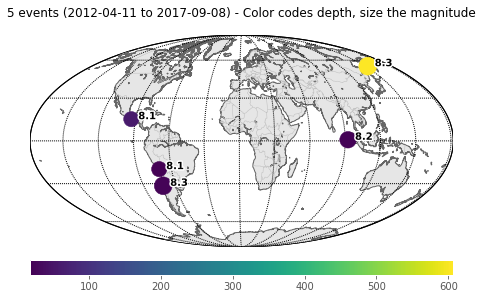

Event:	2017-09-08T04:49:20.000000Z | +15.036,  -93.907 | 8.1 Mww

	            resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?eventid=10402114")
	             event_type: 'earthquake'
	    preferred_origin_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=25226154")
	 preferred_magnitude_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?magnitudeid=182916729")
	                   ---------
	     event_descriptions: 1 Elements
	                origins: 1 Elements
	             magnitudes: 1 Elements


In [9]:
from obspy.clients.fdsn import Client

client = Client("IRIS")
catalog = client.get_events(minmagnitude=8, limit=5)
print(catalog)
catalog.plot()
event = catalog[0]
print(event)

- cerca le stazioni per vedere le forme d'onda per l'evento. Le stazioni dovrebbero ..
     * essere disponibili al momento dell'evento
     * usare uno stream verticale di 1 Hz ("LHZ", per non sopraffare la nostra rete ..)
     * essere a distanza angolare ravvicinata attorno all'evento (ad esempio 90-91 gradi)
     * regolare la ricerca in modo che solo un numero limitato di stazioni (ad esempio 3-6) corrisponda ai criteri di ricerca
     * Una volta che hai trovato un buon set di stazioni, usa `level="response"` poiché avrai bisogno della risposta più tardi.

In [10]:
origin = event.origins[0]
t = origin.time

inventory = client.get_stations(longitude=origin.longitude, latitude=origin.latitude,
                                minradius=101, maxradius=103,
                                starttime=t, endtime =t+100,
                                channel="LHZ", level="response",
                                matchtimeseries=True)
print(inventory)

Inventory created at 2018-04-23T13:33:13.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.32
		    http://service.iris.edu/fdsnws/station/1/query?level=response&longi...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (4):
			II, ND, NZ, YT
		Stations (6):
			II.ERM (Erimo, Hokkaido Island, Japan)
			ND.MARNC (Mare, Loyalty islands, New Caledonia)
			NZ.KHZ (Kahutara)
			NZ.QRZ (Quartz Range)
			YT.FALL (FALL)
			YT.PECA (PECA)
		Channels (7):
			II.ERM.00.LHZ, II.ERM.10.LHZ, ND.MARNC.00.LHZ, NZ.KHZ.10.LHZ, 
			NZ.QRZ.10.LHZ, YT.FALL..LHZ, YT.PECA..LHZ


- per ognuna di queste stazioni scaricare i dati dell'evento, ad es. da un paio di minuti prima a mezz'ora dopo l'evento
- metti tutti i dati insieme in uno stream (metti la chiamata `get_waveforms()` in un blocco try/except/pass per saltare silenziosamente le stazioni che in realtà non hanno dati disponibili)
- stampa le informazioni di stream, plotta i dati grezzi

5 Trace(s) in Stream:
II.ERM.00.LHZ   | 2017-09-08T04:44:20.069538Z - 2017-09-08T05:19:19.069538Z | 1.0 Hz, 2100 samples
II.ERM.10.LHZ   | 2017-09-08T04:44:20.069538Z - 2017-09-08T05:19:19.069538Z | 1.0 Hz, 2100 samples
ND.MARNC.00.LHZ | 2017-09-08T04:44:20.956871Z - 2017-09-08T05:19:19.956871Z | 1.0 Hz, 2100 samples
NZ.KHZ.10.LHZ   | 2017-09-08T04:44:20.069534Z - 2017-09-08T05:19:19.069534Z | 1.0 Hz, 2100 samples
NZ.QRZ.10.LHZ   | 2017-09-08T04:44:20.069536Z - 2017-09-08T05:19:19.069536Z | 1.0 Hz, 2100 samples


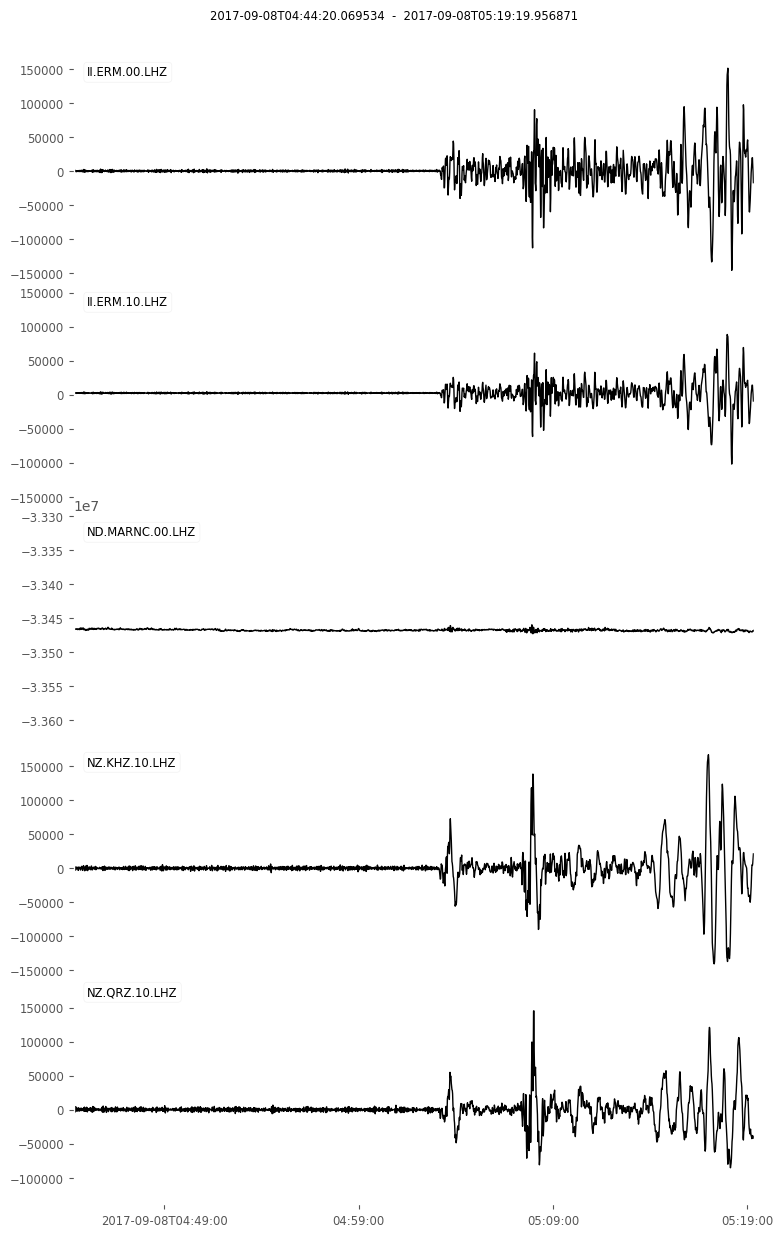

In [11]:
from obspy import Stream
st = Stream()

for network in inventory:
    for station in network:
        try:
            st += client.get_waveforms(network.code, station.code, "*", "LHZ",
                                       t - 5 * 60, t + 30 * 60)
        except:
            pass

print(st)
st.plot()

- correggi la risposta dello strumento per tutte le stazioni e traccia i dati corretti

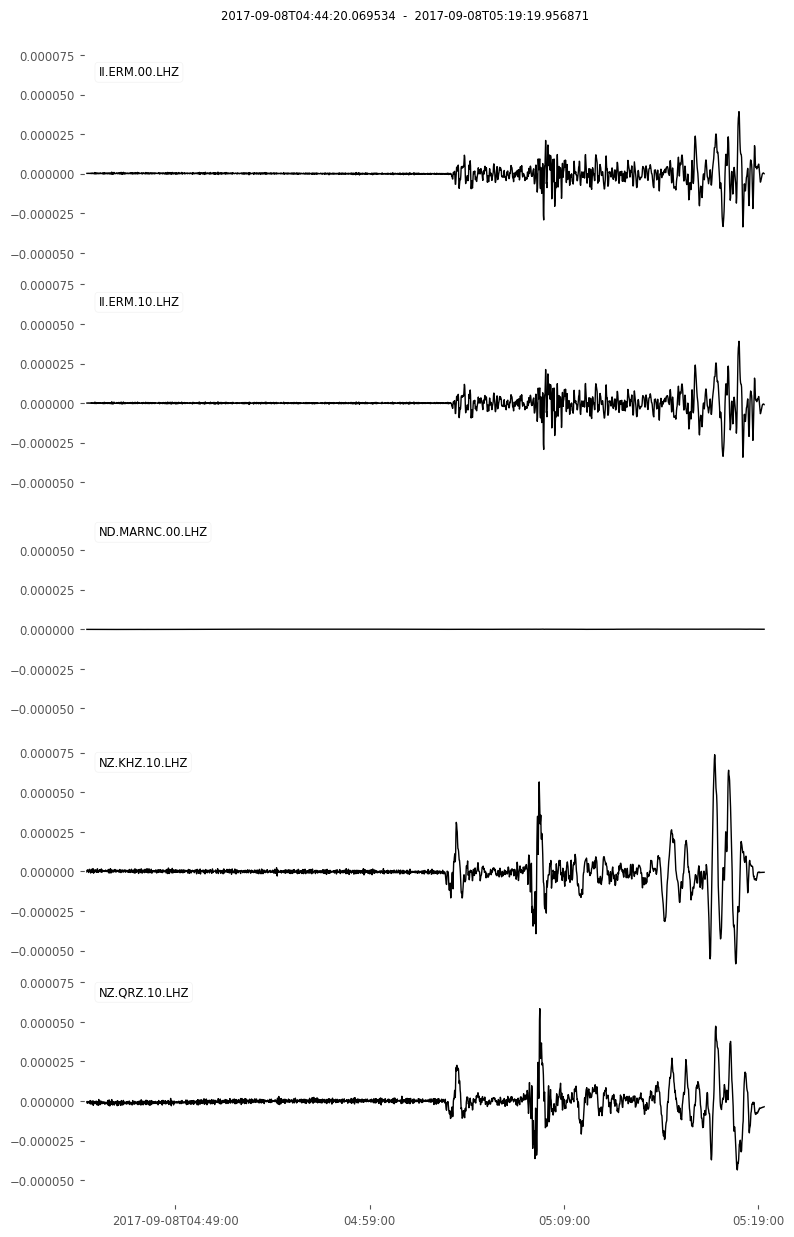

In [12]:
st.remove_response(inventory=inventory, water_level=20)
st.plot()

Se hai tempo, assembla e plotta un altro set di dati simile